### NLP Sentiment Analysis Exercise

In [1]:
# import numpy 
import numpy as np 

# import pandas
import pandas as pd 

# import regex
import re

# import nltk
import nltk 

In [12]:
# load data
data = './res/data/tweets.csv'
df = pd.read_csv(data)

**Task:** Print the top 5 rows.

In [13]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Task:** Use the `'text'` column to create an array with the name `'features'`.



In [159]:
features = np.array(df['text'])

**Task:** Use `'airline_sentiment'` column to create an array with the name `'labels'`.

In [160]:
labels = np.array(df['airline_sentiment'])

**Task:** Clean the text data in the `'features'` array.

    - Remove all the special characters.
    - Remove all single characters.
    - Remove single characters from the start.
    - Substituting multiple spaces with single space.
    - Converting all text to lowercase.

In [174]:
processed_features = []

for sentence in features:
    # Remove all the special characters
    sentence = re.sub(r'([^\w\s]|\_)', '', sentence)

    # Remove all single characters
    sentence = re.sub(r'(^| )\w( |$)', ' ', sentence)

    # Remove single characters from the start
    sentence = re.sub(r'^\w+\s', '', sentence)
    
    # Remove urls
    sentence = re.sub(r'http\w+$', '', sentence)
    
    # Remove spaces at the end
    sentence = re.sub(r'\s$', '', sentence)

    # Substituting multiple spaces with single space
    sentence = re.sub(r'\s+', ' ', sentence)

    # Converting to Lowercase
    sentence = sentence.lower()
    
    processed_features.append(sentence)

In [224]:
df_features = pd.DataFrame(processed_features, columns=['review'])

**Task:** Import stopwords from nltk.

In [209]:
from nltk.corpus import stopwords

**Task:** Import TfidfVectorizer from sklearn.

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Task:** Instatiate TfidfVectorizer with following parameters:

    - max_features = 2500
    - min_df = 7
    - max_df = 0.8
    - stop_words = stopwords.words('english')
    
    


In [211]:
from collections import Counter
import matplotlib.pyplot as plt

words = []
for sentence in  processed_features:
    words.extend(sentence.split())

sum(pd.DataFrame( Counter(words).most_common(
    int( len(set(words) ) * 0.25)
    ) )[1]) / len(words)

0.9341468223541525

In [212]:
vector = TfidfVectorizer(
    max_features=2500,
    min_df=7,
    max_df=0.8,
    stop_words=stopwords.words('english'))

**Bonus:** How would you determine optimal parameters for TfidfVectorizer? Discuss with your peers and/or mentors. Write down your answer below.

- about 25% of the words represent 90% of unique values

**Task:** Transform features with vectorizer. 

In [213]:
x = vector.fit_transform(df_features['review']).toarray()

**Task:** Import train_test_split from sklearn and split the data.

In [214]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, labels)

**Task:** Import any classifier of your choice from sklearn (e.g. Random Forest, LogReg, Naive Bayes).

In [219]:
ytest

array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [215]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

**Task:** Fit your classifier to data.

In [216]:
nb.fit(xtrain, ytrain)

GaussianNB()

**Task:** Predict X_test.

In [217]:
ypred = nb.predict(xtest)

**Task:** Import confusion matrix and accuracy_score.

**Task:** Print confusion matrix.

**Task:** Print accaccuracy_score.

0.42595628415300546

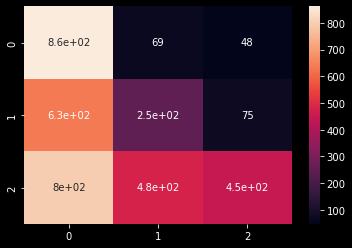

In [218]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

sns.heatmap(confusion_matrix(ypred, ytest), annot=True)

accuracy_score(ypred, ytest)